<a href="https://colab.research.google.com/github/VIVEK-JADHAV/QuoraQuestionPair/blob/main/QuoraDataPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Flatten,Embedding,LSTM,Lambda
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

tf.config.run_functions_eagerly(True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Loading the train data 
train=pd.read_csv('/content/data/train.csv')
train.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Data preprocessing

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
#Data cleaning
stopwrd_lst=stopwords.words('english')
stopwrd_lst.remove('no')
stopwrd_lst.remove('not')
stopwrd_lst.remove('nor')

def cleanText(text):
  new_str=text.lower()                                          #Converting to lower case

  new_str=re.sub(r'\(.*?\)','',new_str)                         #Remove data within bracket
  new_str=re.sub(r'\<.*?\>','',new_str)                         #Remove data html tags
  new_str = re.sub("[^a-zA-Z]", " ", new_str)                   #Remove special chars,numbers,punctuations  
  new_str= [contraction_mapping[i] if i in contraction_mapping else i for i in new_str.split()]    #Convert short forms to long forms
  new_str=[i for i in new_str if i not in stopwrd_lst]    #Remove stopwords
  new_str=[i for i in new_str if len(i)>2]                      #Remove words of length less than 3

  new_str=' '.join(new_str)                                     #Join all the words

  return new_str
  

In [ ]:
#Cleaning question1 and question2 columns
train['question1']=train['question1'].apply(lambda x:cleanText(x))
train['question2']=train['question2'].apply(lambda x:cleanText(x))

In [ ]:
#Example of cleaned data
print(train['question1'][1000])
print(train['question2'][1000])

convert raw files jpeg photos macbook
convert raw files jpeg


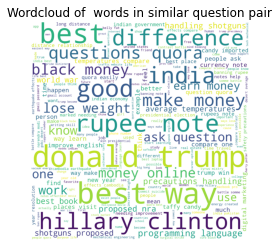

In [ ]:
#Frequent words in similar questions

duplicate=train['question1'][train['is_duplicate']==1].values+train['question2'][train['is_duplicate']==1].values
text=' '.join(duplicate)
wordcloud = WordCloud(width = 1500, height = 1500, 
                background_color ='white',                               
                min_font_size = 10).generate(text)
plt.axis("off")
plt.title('Wordcloud of  words in similar question pair')
plt.imshow(wordcloud)
plt.show()

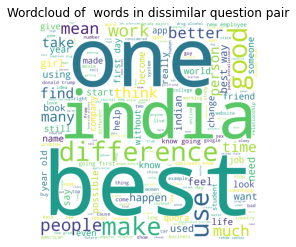

In [ ]:
#Frequent words in non-duplicated questions

non_duplicate=train['question1'][train['is_duplicate']==0].values+train['question2'][train['is_duplicate']==0].values
text=' '.join(non_duplicate)
wordcloud = WordCloud(width = 1500, height = 1500, 
                background_color ='white',                               
                min_font_size = 10).generate(text)
plt.axis("off")
plt.title('Wordcloud of  words in dissimilar question pair')
plt.imshow(wordcloud)
plt.show()

In [ ]:
#Perform train-val-test split
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(train[['question1','question2']],train['is_duplicate'],test_size=0.15
                                               ,random_state=40,stratify=train['is_duplicate'])

X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=40,stratify=Y_train)

X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

Y_train.reset_index(inplace=True,drop=True)
Y_val.reset_index(inplace=True,drop=True)
Y_test.reset_index(inplace=True,drop=True)

print('X_train shape',X_train.shape,' Y_train shape ',Y_train.shape)
print('X_val shape',X_val.shape,' Y_val shape ',Y_val.shape)
print('X_test shape',X_test.shape,' Y_test shape ',Y_test.shape)

X_train shape (274914, 2)  Y_train shape  (274914,)
X_val shape (60644, 2)  Y_val shape  (60644,)
X_test shape (68729, 2)  Y_test shape  (68729,)


In [ ]:
#Determine maxlength of question1 and question2 columns

def computeMax(df,column):
  mx=0
  total_words=[]
  for i in df[column].values:
    words=len(i.split())
    total_words.append(words)
    mx=max(mx,words)
  return mx,total_words

mx_ques1,word_ques1=computeMax(X_train,'question1')
mx_ques2,word_ques2=computeMax(X_train,'question2')

print('Max word length for question1 column is',mx_ques1)
print('Max word length for question2 column is',mx_ques2)

Max word length for question1 column is 50
Max word length for question2 column is 97


In [ ]:
#Compute percentile values
#Analysing the number of words in questions

def computePercentile(words,start,end,step):
  percentile_text=np.percentile(words,np.arange(start,end,step))
  j=0
  for i in np.arange(start,end,step):
    print('{}th percentile is {}'.format(np.round(i,1),percentile_text[j]))
    j+=1

In [ ]:
#Analysing the number of words in question1
computePercentile(word_ques1,0,110,10)

0th percentile is 0.0
10th percentile is 3.0
20th percentile is 3.0
30th percentile is 4.0
40th percentile is 4.0
50th percentile is 5.0
60th percentile is 5.0
70th percentile is 6.0
80th percentile is 7.0
90th percentile is 9.0
100th percentile is 50.0


In [ ]:
#Analysing the number of words in question1
computePercentile(word_ques1,90,100,1)

90th percentile is 9.0
91th percentile is 9.0
92th percentile is 9.0
93th percentile is 10.0
94th percentile is 10.0
95th percentile is 11.0
96th percentile is 11.0
97th percentile is 12.0
98th percentile is 13.0
99th percentile is 14.0


In [ ]:
#Analysing the number of words in question1
computePercentile(word_ques1,99,100,0.1)

99.0th percentile is 14.0
99.1th percentile is 14.0
99.2th percentile is 15.0
99.3th percentile is 15.0
99.4th percentile is 15.0
99.5th percentile is 16.0
99.6th percentile is 16.0
99.7th percentile is 17.0
99.8th percentile is 18.0
99.9th percentile is 21.0


99.9 percentile of questions have length less than 21. Setting max length for question1 to be 21

In [ ]:
#Analysing the number of words in question2
computePercentile(word_ques2,0,110,10)

0th percentile is 0.0
10th percentile is 3.0
20th percentile is 3.0
30th percentile is 4.0
40th percentile is 4.0
50th percentile is 5.0
60th percentile is 5.0
70th percentile is 6.0
80th percentile is 7.0
90th percentile is 9.0
100th percentile is 97.0


In [ ]:
#Analysing the number of words in question2
computePercentile(word_ques2,90,100,1)

90th percentile is 9.0
91th percentile is 9.0
92th percentile is 10.0
93th percentile is 10.0
94th percentile is 11.0
95th percentile is 11.0
96th percentile is 12.0
97th percentile is 13.0
98th percentile is 14.0
99th percentile is 15.0


In [ ]:
#Analysing the number of words in question2
computePercentile(word_ques2,99,100,0.1)

99.0th percentile is 15.0
99.1th percentile is 16.0
99.2th percentile is 16.0
99.3th percentile is 16.0
99.4th percentile is 17.0
99.5th percentile is 18.0
99.6th percentile is 19.0
99.7th percentile is 20.0
99.8th percentile is 21.0
99.9th percentile is 24.0


99.9 percentile of questions have length less than 24. Setting max length for question2 to be 24

In [ ]:
#Tokenization

ques1_mx_length=21
ques2_mx_length=24

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',oov_token='UNK',split=" ",char_level=False,num_words=70000)
tokenizer.fit_on_texts(X_train['question1'].values+X_train['question2'].values)

ques1_train= tokenizer.texts_to_sequences(X_train['question1'])
ques1_val = tokenizer.texts_to_sequences(X_val['question1'])


ques1_train = tf.keras.preprocessing.sequence.pad_sequences(ques1_train,padding='post',maxlen=ques1_mx_length)
ques1_val = tf.keras.preprocessing.sequence.pad_sequences(ques1_val,padding='post',maxlen=ques1_mx_length)


ques2_train= tokenizer.texts_to_sequences(X_train['question2'])
ques2_val = tokenizer.texts_to_sequences(X_val['question2'])


ques2_train = tf.keras.preprocessing.sequence.pad_sequences(ques2_train,padding='post',maxlen=ques2_mx_length)
ques2_val = tf.keras.preprocessing.sequence.pad_sequences(ques2_val,padding='post',maxlen=ques2_mx_length)



In [ ]:
#Setting the vocab size
vocab_size=len(tokenizer.word_index)+1

#Printing the shapes after tokenization
print('Shape of train data:',ques1_train.shape,ques2_train.shape)
print('Shape of val data:',ques1_val.shape,ques2_val.shape)


Shape of train data: (274914, 21) (274914, 24)
Shape of val data: (60644, 21) (60644, 24)


In [ ]:
#Downloading Glove vectors
!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip '/content/data/glove.6B.zip'

--2021-01-24 06:09:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-24 06:09:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-24 06:09:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#Loading all the Glove vectors to a dictionary
embeddings_index = {}
f = open('/content/data/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
#Building embedding matrix with words present in the tokenizer
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:    
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(230639, 100)